# Data management & Univariate analysis

In this assignment I will start data analysis for the research project described here:

[Research proposal](https://github.com/CourseraParticipant/Data-Management-and-Visualization/blob/master/Research%20proposal-checkpoint.ipynb)

More precisely, I shall conduct data management &graphical (univariate and bivariate) analysis. The goals will be done in few steps, and the code in Python will be thus splitted into blocks. Let me start by loading the data set NESARC.

In [1]:
# Step 1: Loading data which is saved in the working directory as csv file under name "nesarc.csv"
%matplotlib inline  
# specific for jupyter notebook: for graphs to be displayed inline
# Importing libraries
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
# load data set
data = pandas.read_csv("nesarc.csv",low_memory = False)
# Checking how many observations the dataset contains
print("Total number of rows in the data source")
print(len(data))
#Checking how many variables/columns are traked with tha data
print("Total number of variables present in the original data")
print(len(data.columns))

Total number of rows in the data source
43093
Total number of variables present in the original data
3008


The next step is extract a subset from  the original data, which includes only observations relevant for my research question. Namely, according to my research focus, I am interesting only into the following 4 variables: S1Q1F, S1Q8A, S1Q9B and S13Q1. Thus, I will subset the original data containing only those 4 variables / columns. Each of these 3 variables will be transformed in numeric and missing data will be set to NaN.

In [2]:
# Step 2: Data management: Extracting only needed data & Conversion to numeric & Setting missing data to NaN
# Firstly, since Python is case-sensitive I shall change the names of all columns to uppercase
data.columns = map(str.upper,data.columns)
# extracting only 4 necessary variables:
sub0=data[['S1Q1F','S1Q8A', 'S1Q9B', 'S13Q1']]
sub1 =sub0.copy()
#set missing data to NaN
sub1['S1Q9B']=sub1['S1Q9B'].replace(' ', numpy.nan)
sub1['S1Q1F']=sub1['S1Q1F'].replace(9, numpy.nan)
sub1['S13Q1']=sub1['S13Q1'].replace(99, numpy.nan)

# conversion to numeric
sub1['S1Q1F']=pandas.to_numeric(sub1['S1Q1F'])
sub1['S1Q8A']=pandas.to_numeric(sub1['S1Q8A'])
sub1['S1Q9B']=pandas.to_numeric(sub1['S1Q9B'])
sub1['S13Q1']=pandas.to_numeric(sub1['S13Q1'])


## Univariate Analysis (Graphics)
According to my research focus, I am interesting only into subjects born in the U.S.A. As the codebook states, the variable "S1Q1F" keeps track on the question whether a subject was /was not burn in the United States.
Before extracting the subset of data, let us now look at the distribution of this variable.

Frequency of U.S. born / non-born data subject
U.S. born        0.826631
Not U.S. born    0.169865
NaN              0.003504
dtype: float64


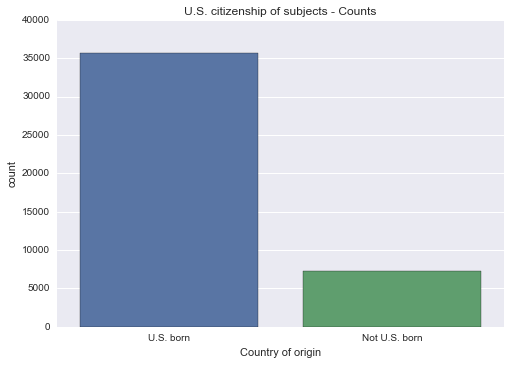

In [3]:
# 1st univariate graphical analysis: How many subjects in data are born in the U.S.?
sub1['S1Q1F'] = sub1['S1Q1F'].astype('category')
sub1['S1Q1F']=sub1['S1Q1F'].cat.rename_categories(["U.S. born",
                                                           "Not U.S. born"
                                                      ])
seaborn.countplot(x='S1Q1F', data=sub1)
plt.xlabel('Country of origin')
plt.title('U.S. citizenship of subjects - Counts')
# Now the same counts but in terms of frequencies/percentages
print("Frequency of U.S. born / non-born data subject")
p1 = sub1['S1Q1F'].value_counts(sort = False,dropna = False, normalize = True)
print(p1)

 **Summary for the first graphical check -  U.S. born subjects** : Here we see around  35000 or ca. 82,7% of the study subjects were born in the U.S., around 7520 subjects were not born in the U.S. whereas for 151 individuals the data does not contain information about birth of place.
 
 Since I aim to investigate only  U.S. born subjects, I may conclude that my subset will be still sufficiently large (as it contains  82.7 % of the provided data).
 Let me know create my data set "myData" by selecting  only subjects born in the U.S.

In [4]:
# Making my own data containing only subjects who were born in the U.S.
sub2 =sub1[sub1['S1Q1F']=="U.S. born"]
myData = sub2.copy()

As stated in my research proposal, I want to define a new variable named EMPL_TYPE which is a combination of the variables describing employments status and last job's type (S1Q8A and  S1Q9B, respectively). Indeed, EMPL_TYPE takes value 0 (Unemployed) if and only if S1Q8A = 2. Otherwise, EMPL_TYPE  takes identical value as the variable S1Q9B. Let me define this variable in the following block of the code.
    

In [5]:
# defining new variable EMPL_TYPE. It will be defined in two steps. 
# 1st step of the definition: Define ne EMPL_TYPE as a copy of the variable S1Q9B
myData['EMPL_TYPE']=myData['S1Q9B']
#2nd step of definition: At the moment, EMPL_TYPE is just a copy of the S1Q9B. This is not right only in the cases when
# S1Q8A = 2 (that is, the subject is unemployed). In this case, I want that my EMPL_TYPE takes value 0. Let me change 
# its value for this particulr case
myData.loc[myData['S1Q8A']==2,'EMPL_TYPE']=0

In the following code block I perform the last data management step. It is about the variable which counts number of times stayed in hospital overnight in last 12 months (variable S13Q1). Currently, it may take values between 0 and 98.Actually, I could define one new variable HOSP_MONTHLY which estimates how many times per month (on average) the person has visited hospital in last 12 months. Thus, its value is simply set to S13Q1/12. Thus, the new variable HOSP_MONTHLY may take values between 0 and 8

In [6]:
# define new variable HOSP_MONTHLY as number of average monthly hospital stays in past 12 months
myData['HOSP_MONTHLY']= round(myData['S13Q1'] / 12)

Associated percentages for employed/unemployed subjects who were born in the U.S.
Employed      0.710263
Unemployed    0.289737
dtype: float64


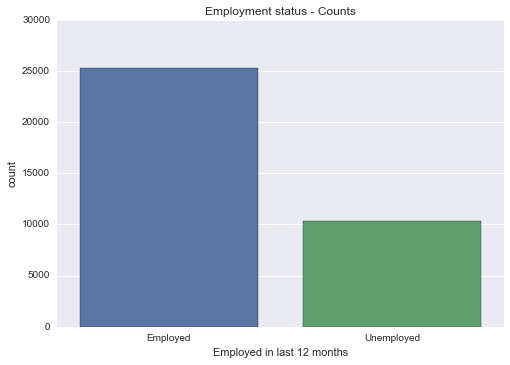

In [7]:
# Step 3 : Univariate graphical analysis on the subset
# The 1st variable - Employment status in the last 12 months, represented by 'S1Q8A' with codes: 1 - Yes, 2 - No
# Counts of employed/unemployed subjects (in last 12 moths)
myData['S1Q8A'] = myData['S1Q8A'].astype('category')
myData['S1Q8A'] = myData['S1Q8A'].cat.rename_categories(["Employed",
                                                           "Unemployed"
                                                      ])
seaborn.countplot(x='S1Q8A', data=myData)
plt.xlabel('Employed in last 12 months')
plt.title('Employment status - Counts')
print('Associated percentages for employed/unemployed subjects who were born in the U.S.')
p2=myData['S1Q8A'].value_counts(sort = False, dropna = False, normalize = True)
print(p2)

 **Summary for the second graphical check - Employment status in the last 12 months of  U.S. born subjects ** : Here we see that around 25 000, or approximately 71% of the U.S. born subjects, have been employed in the last 12 months, whereas about 10000 U.S. born subjects or ca. 29 % were unemployed in the same time period. 
 
 Let me now look at the second variable of the interest: the occupation type, which is given by the variable 'EMPL_TYPE'. 

Associated percentages for employment categories of subjects who were born in the U.S.: 
Unemployed        0.289737
Professional      0.135759
Managers          0.108528
OtherService      0.100696
Sales             0.073129
AdminSupport      0.070294
TechSupport       0.064651
Operators         0.050755
PrecisionCraft    0.025939
Logistics         0.021447
Handlers          0.021139
Protect           0.012941
Agriculture       0.010331
Military          0.007804
Household         0.006850
dtype: float64
Full description for the occupation type:
Unemployed - Unemployed in the last 12 months
Managers - Executive, Administrative, and Managerial
Professional - Professional Speciality
TechSupport - Technical and Related Support
Sales - Sales
AdminSupport - Administrative Support, including Clerical
 Household - Private Household
Protect - Protective Services
OtherService - Other Services
 Agriculture - Farming, Forestry and Fishing
PrecisionCraft - Precision Production, Craft and Repair
Ope

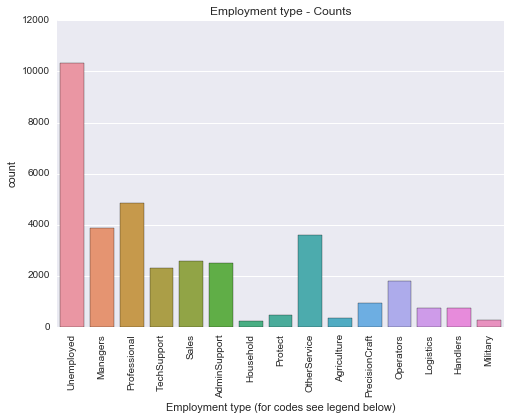

In [8]:
# The second variable - Employment type represented by 'EMPL_TYPE' 
# Counts of occupation types
myData['EMPL_TYPE'] = myData['EMPL_TYPE'].astype('category')
# intuitive labels for the categories
myData['EMPL_TYPE']=myData['EMPL_TYPE'].cat.rename_categories(["Unemployed",
                                                           "Managers",
                                                           "Professional", 
                                                           "TechSupport", 
                                                           "Sales",
                                                           "AdminSupport",
                                                           "Household",
                                                           "Protect",
                                                           "OtherService",
                                                           "Agriculture",
                                                           "PrecisionCraft",
                                                           "Operators",
                                                           "Logistics",
                                                           "Handlers",
                                                           "Military"])
g=seaborn.countplot(x='EMPL_TYPE', data=myData)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel('Employment type (for codes see legend below)')
plt.title('Employment type - Counts')
print('Associated percentages for employment categories of subjects who were born in the U.S.: ')
#frequencies of the occupations
p3=myData['EMPL_TYPE'].value_counts(sort = True, dropna = False, normalize = True)
print(p3)                                                        
                                                           
print ('Full description for the occupation type:')
print ('Unemployed - Unemployed in the last 12 months')
print ('Managers - Executive, Administrative, and Managerial')
print('Professional - Professional Speciality')
print('TechSupport - Technical and Related Support')
print('Sales - Sales')
print('AdminSupport - Administrative Support, including Clerical')
print(' Household - Private Household')
print ('Protect - Protective Services')
print ('OtherService - Other Services')
print(' Agriculture - Farming, Forestry and Fishing')
print('PrecisionCraft - Precision Production, Craft and Repair')
print('Operatiors - Operators, Fabricators and Laborers')
print('Logistics- Transportation and Material Moving')
print('Handlers - Handlers, Equipment Cleaners and Laborers')
print('Military - Military')

 **Summary for the third frequency check - Employment type of  U.S. born subjects ** : Firstly, note that the previous frequency check and the current one agree on the number of uneployed which is ca. 10000 subjects, and it is the biggest category of the EMPL_TYPE variable. Here we see the most of employed subjects belong to category "professional speciality" (13,6% of U.S. born subjects), followed by " Executive, Administrative, and Managerial" (10,9%) and then "Other services" (10.1% ). The least popular occupation type among subjects, according to the data, is "Private haousehold"  and the second smallest category is "Military" group. 

count    34749.000000
mean         0.189243
std          0.970758
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         90.000000
Name: S13Q1, dtype: float64


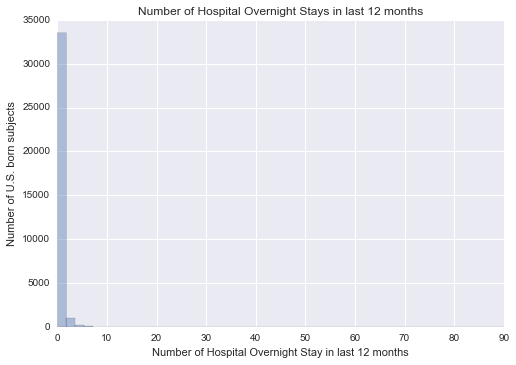

In [9]:
seaborn.distplot(myData['S13Q1'].dropna(), kde=False);

plt.xlabel('Number of Hospital Overnight Stay in last 12 months')
plt.ylabel ('Number of U.S. born subjects')
plt.title('Number of Hospital Overnight Stays in last 12 months')
desc1 = myData['S13Q1'].describe()
print(desc1)

** Summary for the fourth frequency check - Overnight hospital stays (in last 12 months) **:  The distribution is concentrated at value zero (man 0.2), meaning that big majority of subjects did not stay in the hospital over night in the past 12 months. It is right-tailed distributed but with very short til as the spread (standard deviation less than 1) is very small. It seems like there are almost  no sublects who stayed more than 9-10 times overnight  (though the maximal value in data is 90).

Let me now look at the variable that aggregates the previous variable, that is, the one which counts hospital overnight stays on average - the "HOSP_MONTHLY". My guess is that the variable is even more concentrated around zero, since it is equal to the last varible divided by 12 (and as I noted above it seems that (almost) all subjects stayed  less than 12 times in the hospital).

Associated percentages for avg. monthly hopsital overnight stays of subjects who were born in the U.S.: 
 0.0    0.973977
NaN     0.024507
 1.0    0.001235
 2.0    0.000197
 8.0    0.000028
 5.0    0.000028
 3.0    0.000028
dtype: float64


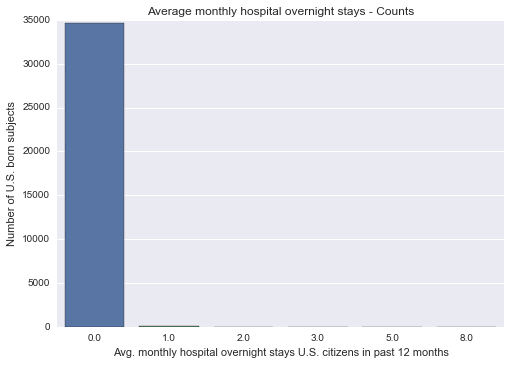

In [10]:
# The third variable -  Number of average monthly times stayed in hospital in last 12 months 
# (excluding delivery of healty liveborn infant)
# Variable name: 'HOSP_MONTHLY'
myData['HOSP_MONTHLY']=pandas.to_numeric(myData['HOSP_MONTHLY'])
# Counts of overnight avg. monthly hospital stays
myData['HOSP_MONTHLY'] = myData['HOSP_MONTHLY'].astype('category')
seaborn.countplot(x='HOSP_MONTHLY', data=myData)
plt.xlabel('Avg. monthly hospital overnight stays U.S. citizens in past 12 months')
plt.ylabel('Number of U.S. born subjects')
plt.title('Average monthly hospital overnight stays - Counts')
print('Associated percentages for avg. monthly hopsital overnight stays of subjects who were born in the U.S.: ')
# associated frequencies
p4=myData['HOSP_MONTHLY'].value_counts(sort = True, dropna = False, normalize = True)
print(p4)

** Summary for the fifth frequency check - Average hospital overnight stays (in last 12 months) **: Big majority (97.4%, ca. 35000) did not stay at hospital overnight at all. For the rest of subjects we mostly miss the date (ca 2,5 % out of 2,6%).  With frequencies, we can see that there are some single cases with maximum 8 mothly hospital overnight visits.
As the HOSP_MONTHLY does not really aggregate/make a difference, I will stick to original "S13Q1" as response variable in the bivariate analysis.

## Bivariate Analysis (Graphics)

As stated in my research proposal, I am interested into relationship among employment type and number of hospital overnight visits (in past 12 months and only for U.S. citizens). Therefore, we explore the relationship between varibles EMPL_TYPE (explanatory; categorical) and 'S13Q1' (response & quantitative).
Because we have the case where we explore "C->Q", we use bar chart,where we show the mean value of the response per each category of the explanatory.

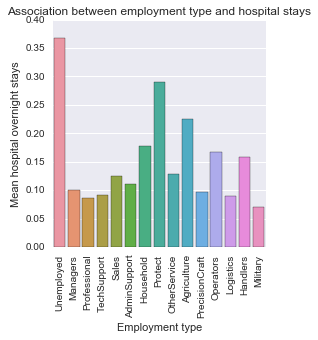

In [11]:
seaborn.factorplot(x='EMPL_TYPE', y='S13Q1', data=myData, kind="bar", ci=None)
plt.xlabel('Employment type')
plt.ylabel('Mean hospital overnight stays')
plt.xticks(rotation=90)
plt.title("Association between employment type and hospital stays")

**Summary for bivariate analysis**: Independent of the employment type, most of the subjects did not stay overnight in hospital ( as the mean on the last graph is around 0 for all groups). However, there is some variation among employment type groups. The highest average hospital stays has group of "Unemployed" U.S. citizens. It is followed by "Protect" ,that are individuals from "Protective Services", then "Agriculture - Farming, Forestry and Fishing". The least hospital stays has the "Military" employment group (which was the sercond smallest group at all, if you remember from the univariate analysis). 

# Summary

By investigating only U.S. born subjects, I approximately exclude 17.3% of all data provided in NESARC and analyze data on ca. 35000 subjects.
71.9% of those subjects,  are /were employed within last 12 months. The most popular job among employed subjests,  seems to be categorized as "professional speciality" and the least popular category is "private household". Regarding the overnight stay in hospital,the big majority of subjects (34695 or 97.4%) did not stay in hospital. Hovever, if one look at the stays over employment groups, the highest mean of hospital stays is in the group of "Unemployed" and the least mean "Military" employment group.